# Subclustering of Ectoderm PS1 in Set 3

In [1]:
# loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
#loading data
seu_HQC <- readRDS(file = "../../data/seurat_object/Set3/seu_HQC_Set3.obj")

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


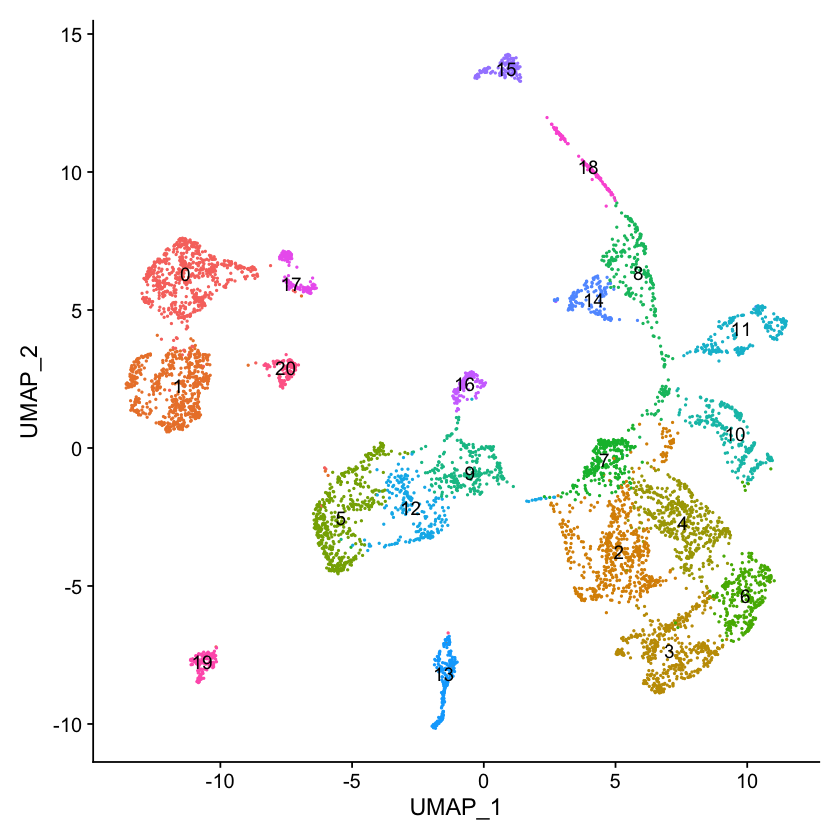

In [4]:
DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend()

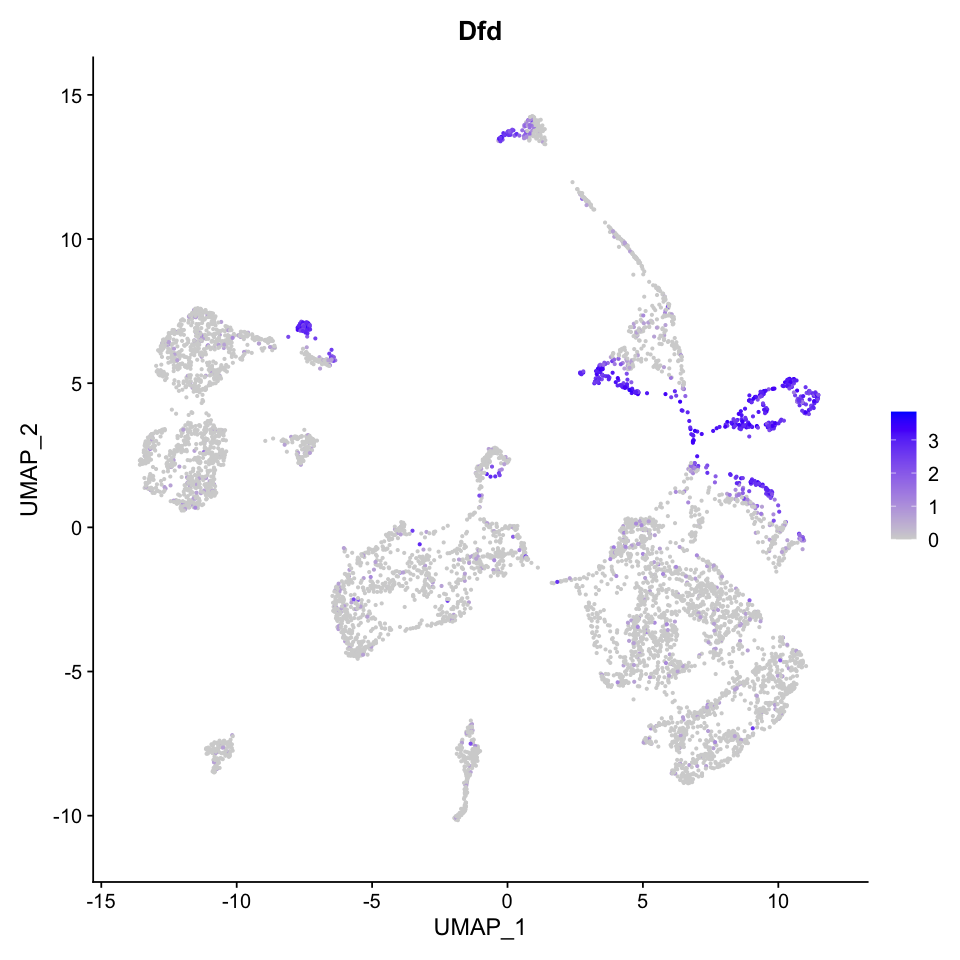

In [5]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC, reduction = "umap", features = c("Dfd"), pt.size = 0.5,  ncol = 1)

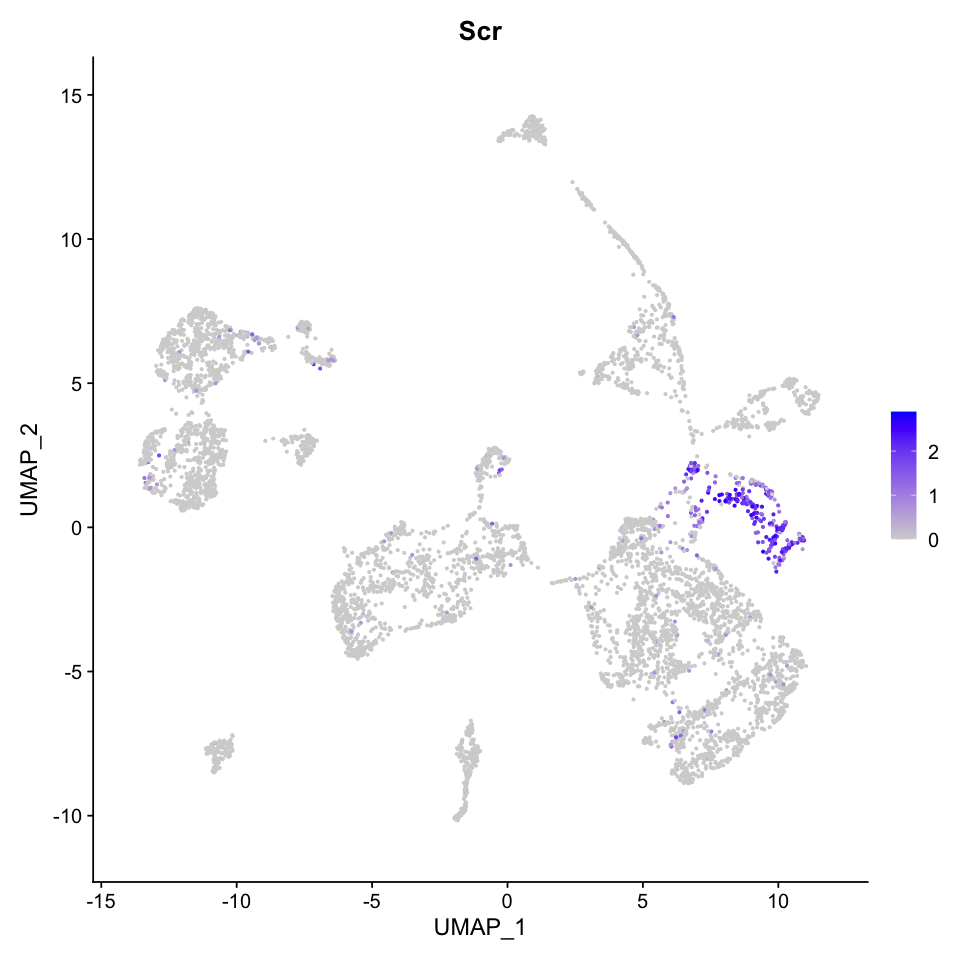

In [6]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC, reduction = "umap", features = c("Scr"), pt.size = 0.5,  ncol = 1)

## picking up target clusters

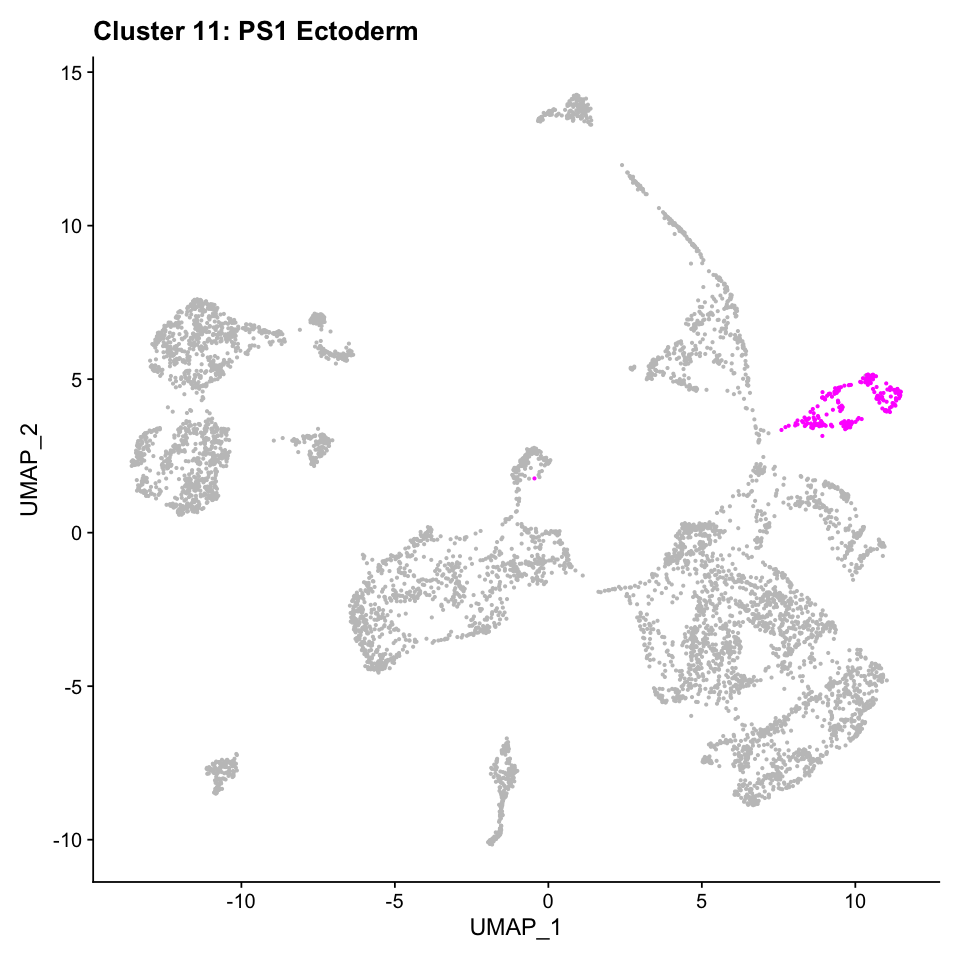

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(11))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend() + ggtitle('Cluster 11: PS1 Ectoderm')

In [8]:
seu_HQC_dfd <- subset(seu_HQC, ident = c("11"))
seu_HQC_dfd

An object of class Seurat 
28756 features across 217 samples within 2 assays 
Active assay: SCT (11250 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [9]:
seu_HQC_dfd$allcell_clusters <- Idents(object = seu_HQC_dfd)

## Clustering
Num of cells < 500  
Skipping re-normalize

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


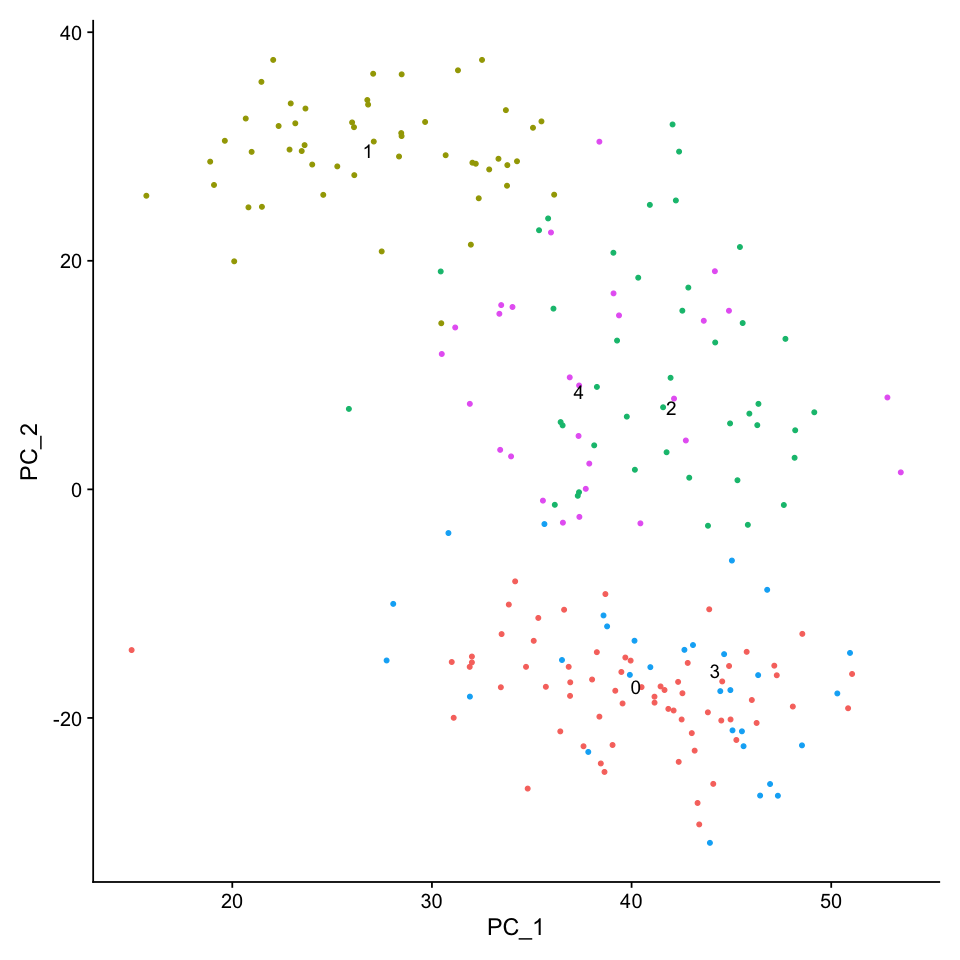

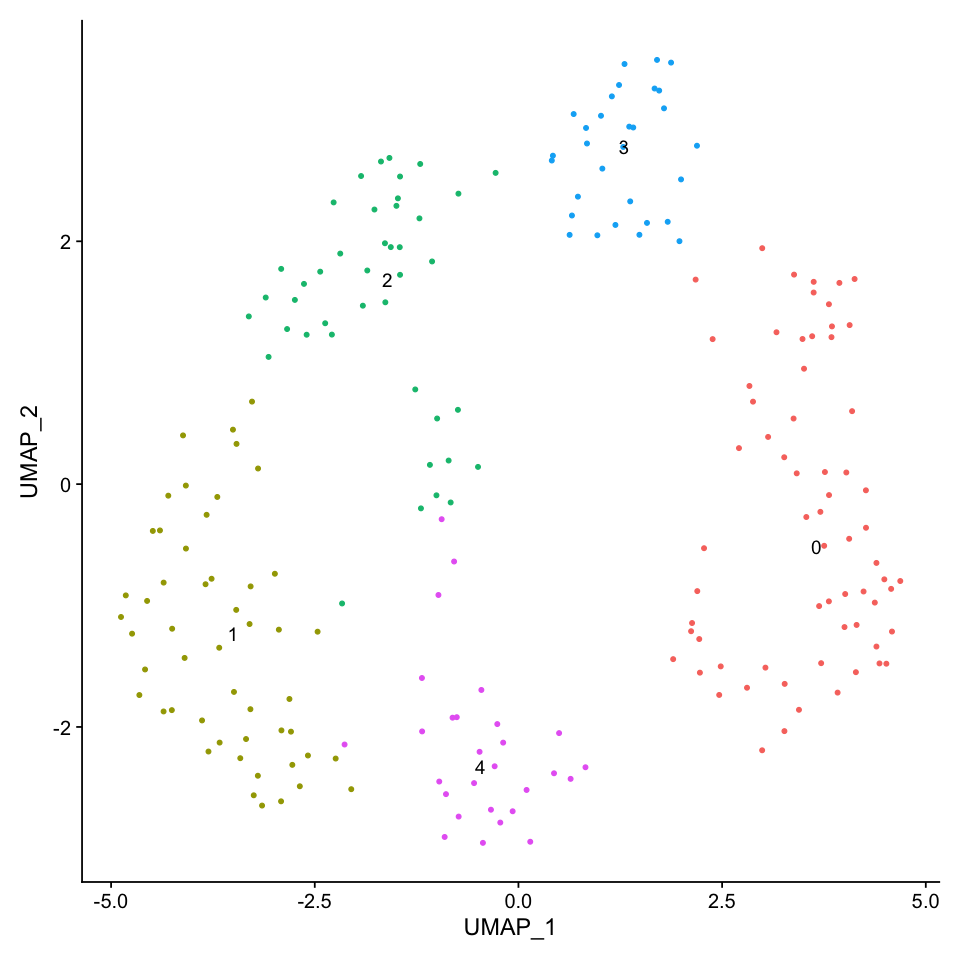

In [10]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_dfd <- RunPCA(seu_HQC_dfd, verbose = FALSE)
# seu_HQC_dfd <- RunTSNE(seu_HQC_dfd, dims = 1:30, verbose = FALSE)
seu_HQC_dfd <- RunUMAP(seu_HQC_dfd, dims = 1:30, verbose = FALSE, n.neighbors = 20L)
seu_HQC_dfd <- FindNeighbors(seu_HQC_dfd, dims = 1:30, verbose = FALSE)
seu_HQC_dfd <- FindClusters(seu_HQC_dfd, verbose = FALSE)
DimPlot(seu_HQC_dfd, reduction =  "pca", label = TRUE) + NoLegend()
# DimPlot(seu_HQC_dfd, reduction =  "tsne", label = TRUE) + NoLegend()
DimPlot(seu_HQC_dfd, reduction =  "umap", label = TRUE) + NoLegend()

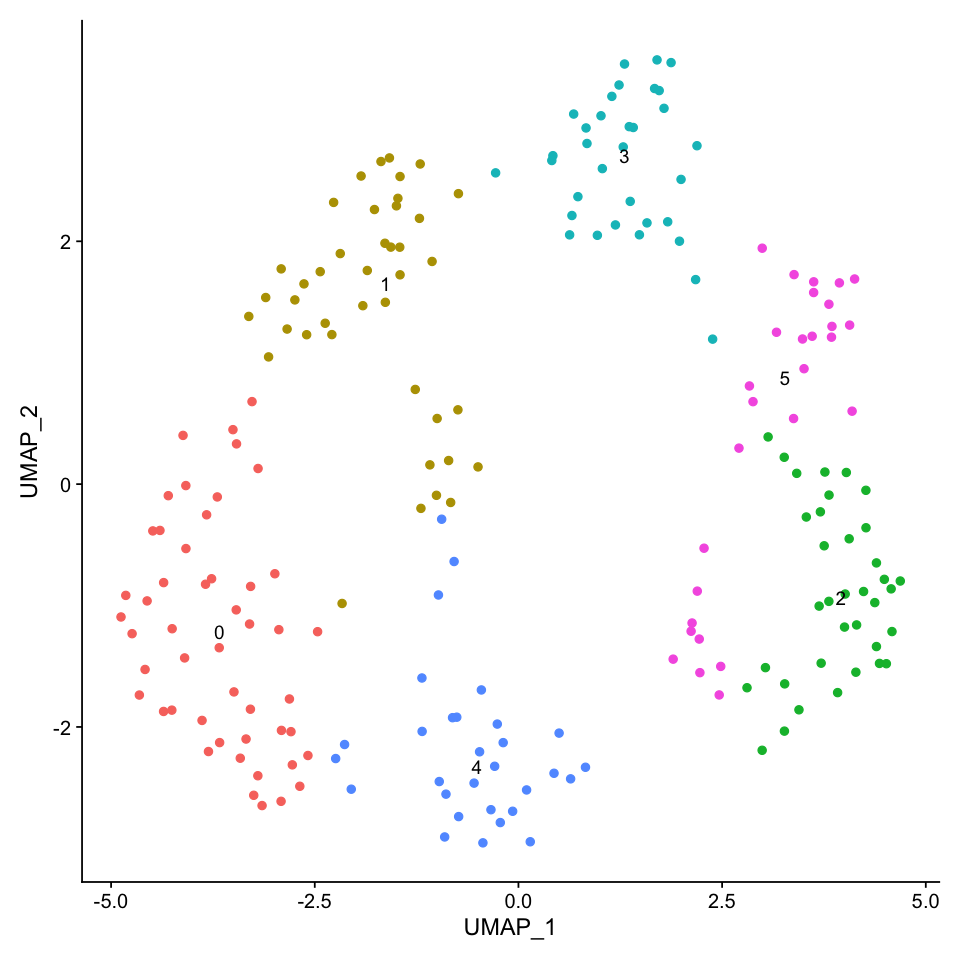

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
seu_HQC_dfd <- FindClusters(seu_HQC_dfd, verbose = FALSE, resolution = 1.4)
DimPlot(seu_HQC_dfd, reduction =  "umap", label = TRUE, pt.size = 2) + NoLegend()

In [12]:
levels <- c(0,1,4,3,5,2)
levels(seu_HQC_dfd) <- levels

In [13]:
all.markers.dfd <- FindAllMarkers(object = seu_HQC_dfd, only.pos = TRUE)


Calculating cluster 0

Calculating cluster 1

Calculating cluster 4

Calculating cluster 3

Calculating cluster 5

Calculating cluster 2



In [14]:
all.markers.dfd.top10 <- all.markers.dfd %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)


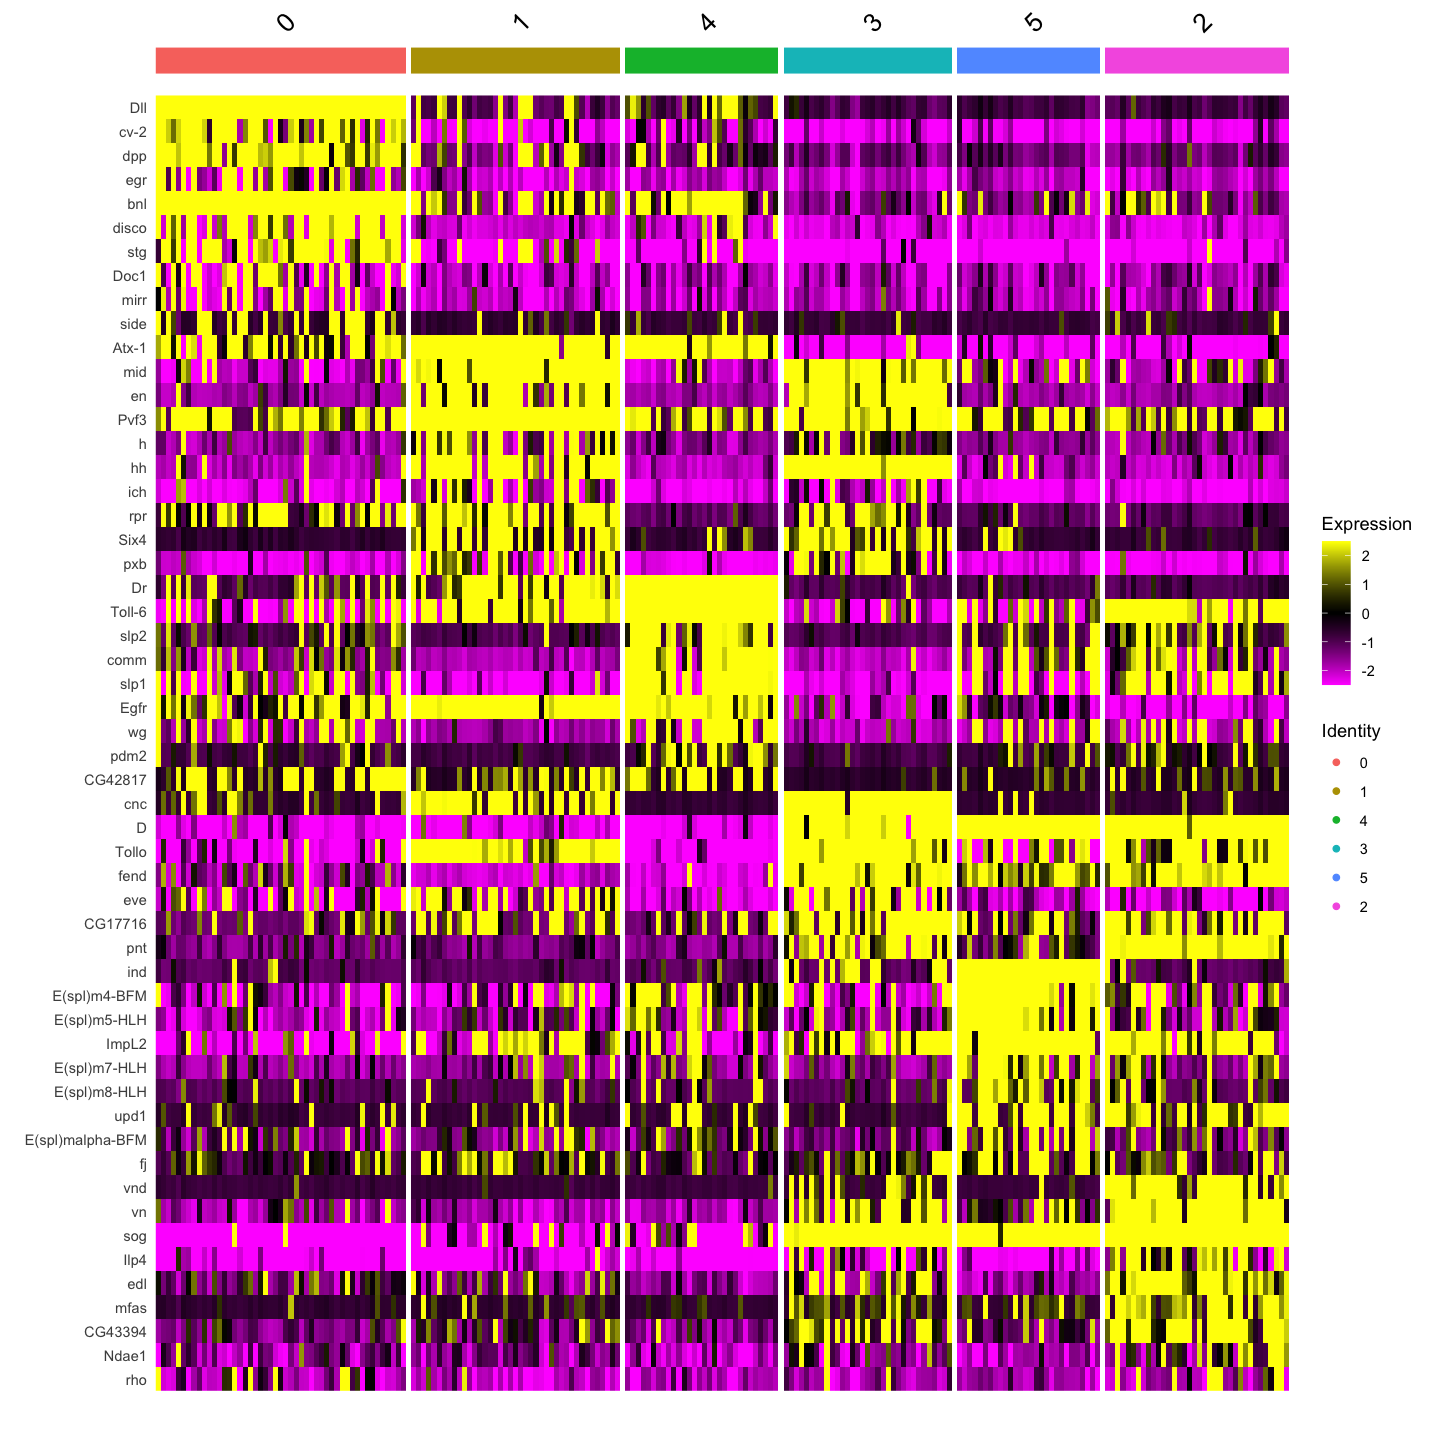

In [15]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu_HQC_dfd, features = c(all.markers.dfd.top10$gene))

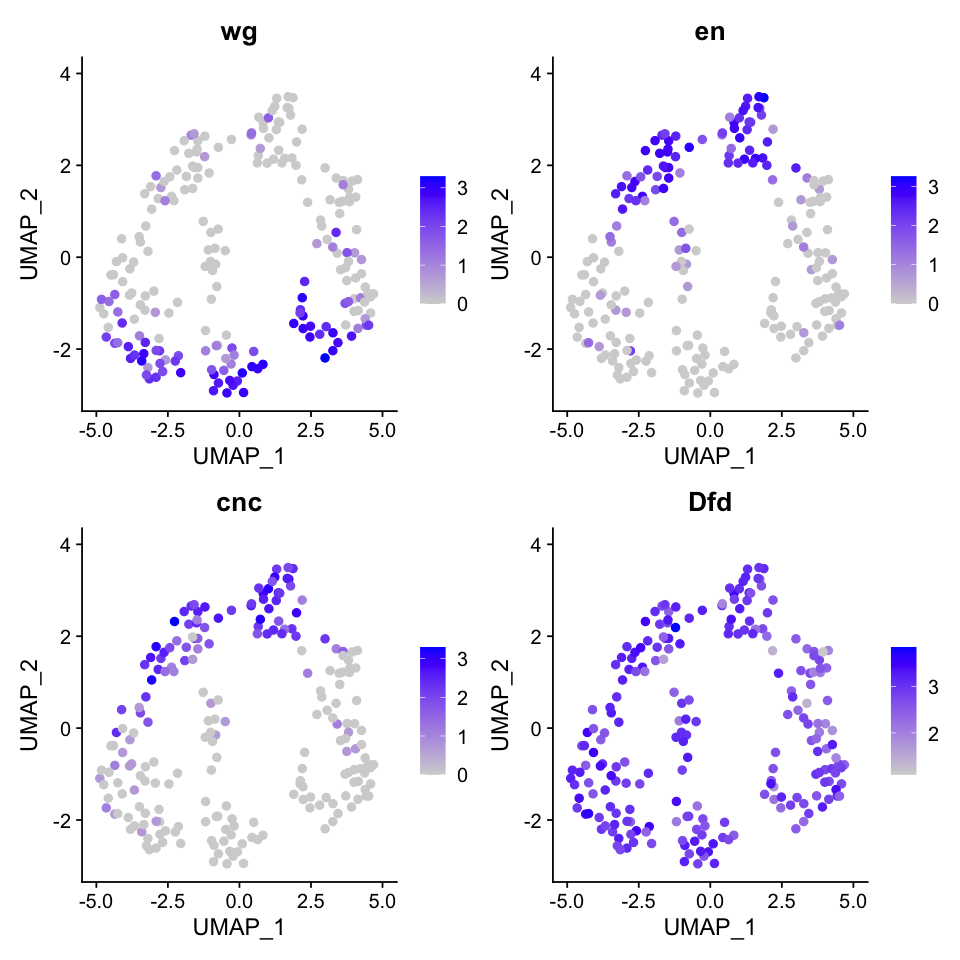

In [16]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_dfd, reduction = "umap", features = c("wg", "en", "cnc", "Dfd"), pt.size = 2,  ncol = 2)

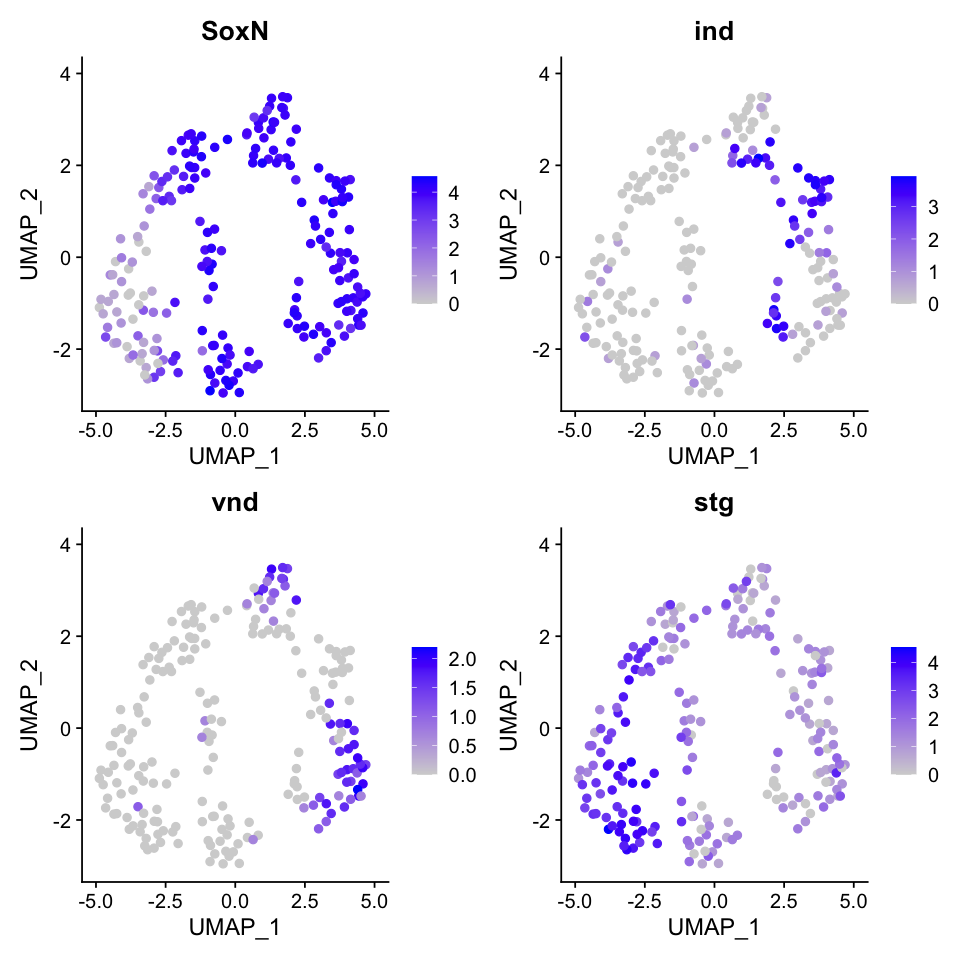

In [17]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_dfd, reduction = "umap", features = c("SoxN", "ind", "vnd", "stg"), pt.size = 2,  ncol = 2)

## Annotation by DV genes

In [18]:
DV_genes <- c("vnd", "pnt", "ind", "sog", "SoxN", "brk", "dpp", "Egfr", "vn", "pnt",
              "Atx-1", "egr", "cv-2", "Doc1", "Ance", "Dr",  "cic",
              "mirr", "ush", "Ama", "Doc2", "Z600", "Doc3", "stg")

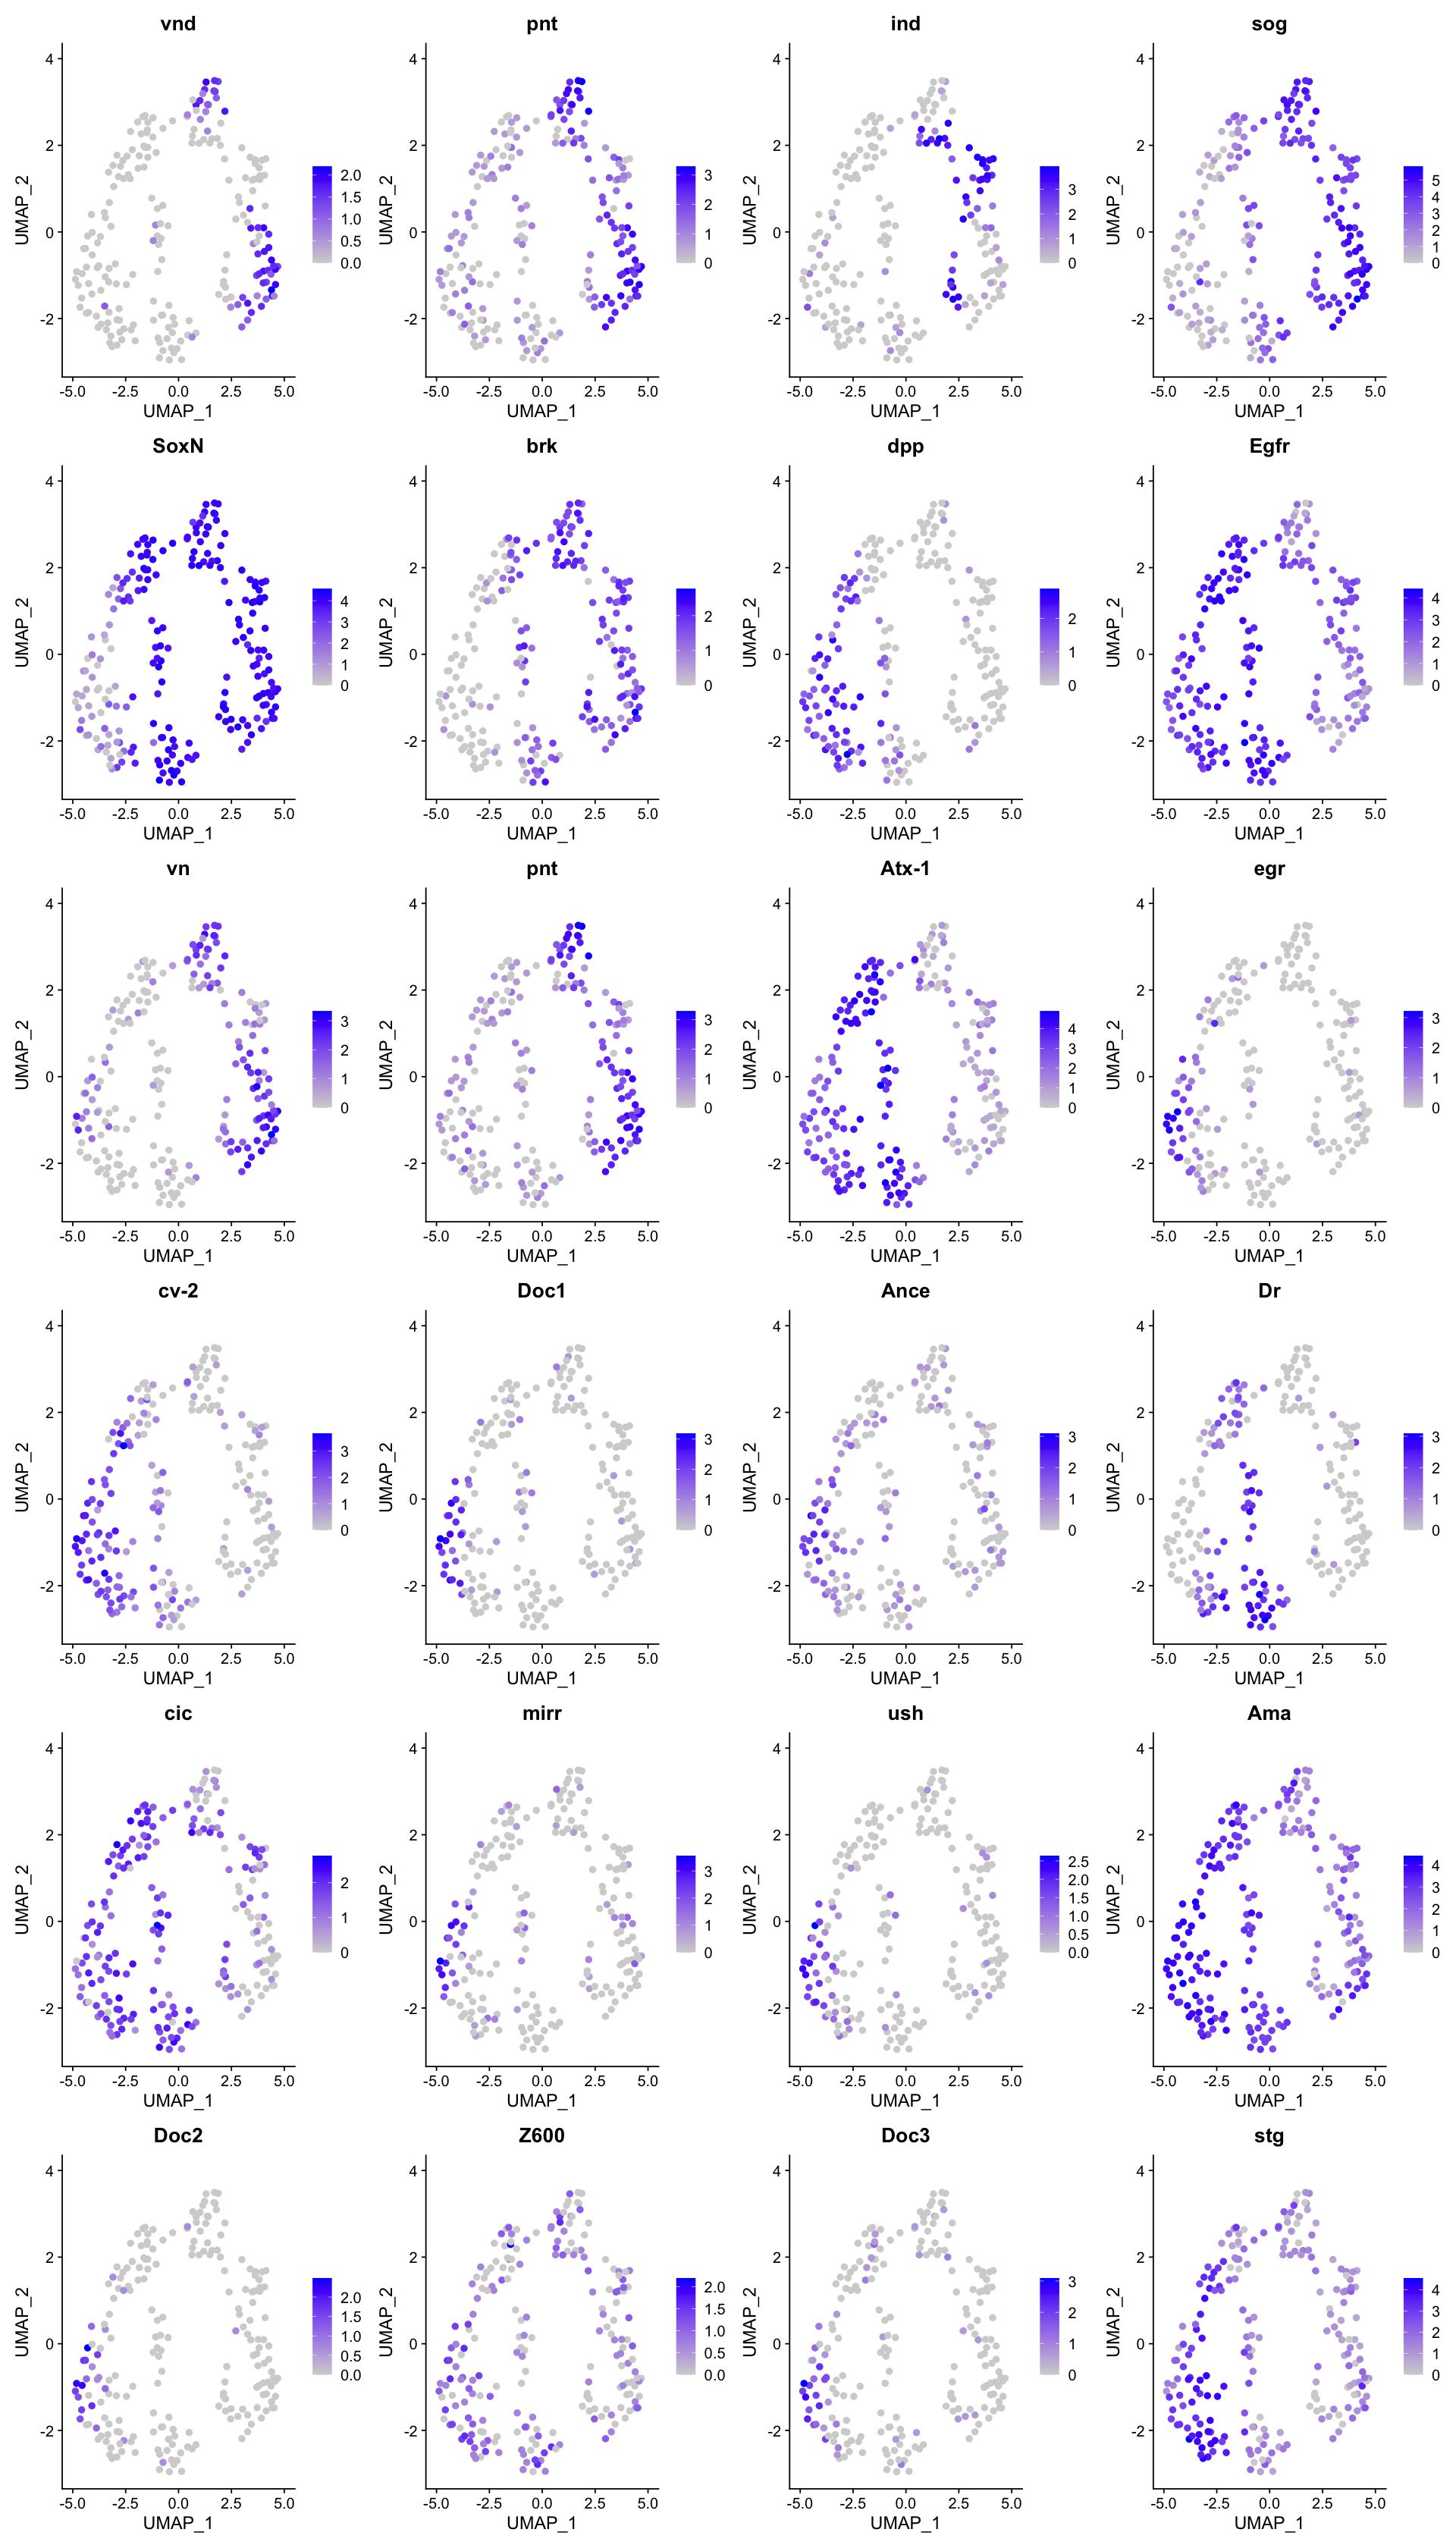

In [19]:
options(repr.plot.width=16, repr.plot.height=28)
FeaturePlot(seu_HQC_dfd, reduction = "umap", features = DV_genes, pt.size = 2,  ncol = 4)

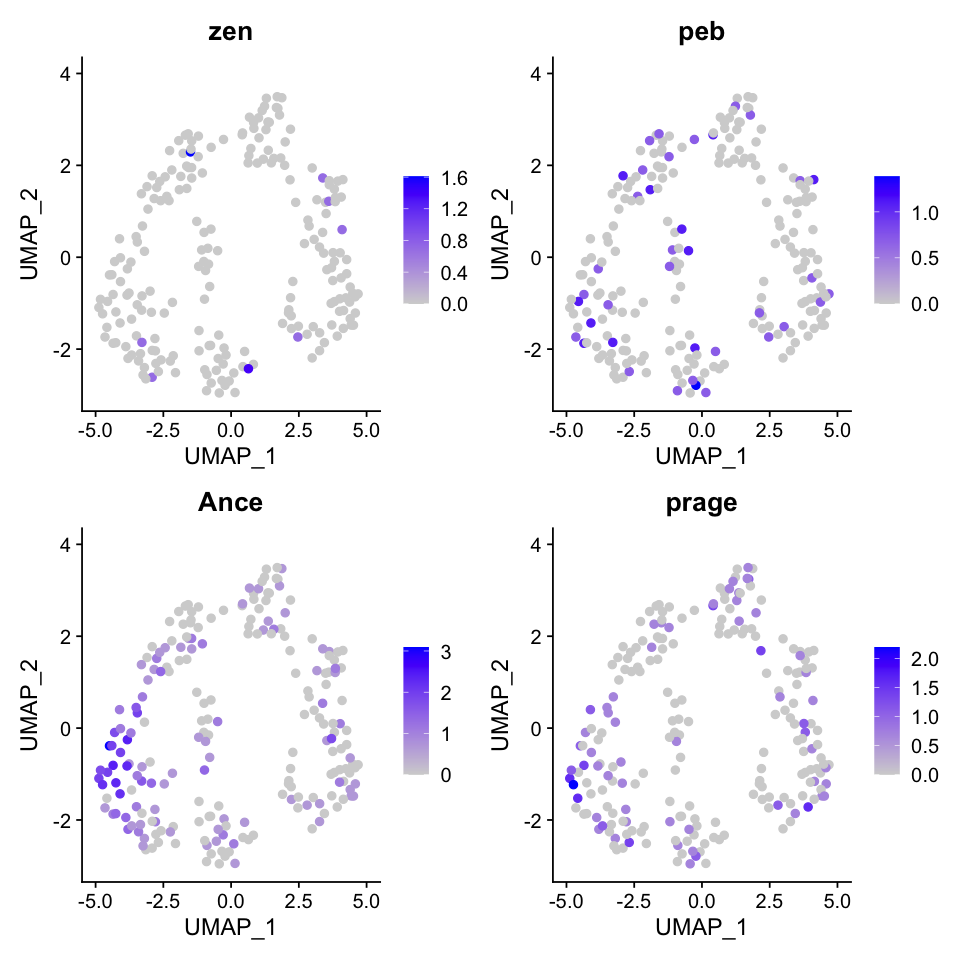

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_dfd, reduction = "umap", features = c('zen','peb','Ance','prage'), pt.size = 2,  ncol = 2)

In [21]:
# set.seed(2)
# normcout <- GetAssayData(seu_HQC_dfd)
# dim(normcout)

# normcout_DV <- normcout[DV_genes, ]
# dim(normcout_DV)

# DV_cluster <- kmeans(x=t(normcout_DV), centers=6)
# DV_cluster

In [22]:
# DV_cluster_ID <- DV_cluster$cluster
# DV_cluster_ID <- as.data.frame(DV_cluster_ID)
# colnames(DV_cluster_ID) <- c("ID")
# DV_cluster_ID$ID <- as.factor( DV_cluster_ID$ID)

# head(DV_cluster_ID)

In [23]:
# seu_HQC_dfd$DV_ID <- DV_cluster_ID

In [24]:
# options(repr.plot.width=8, repr.plot.height=8)
# DimPlot(seu_HQC_dfd, reduction =  "umap", group.by = "DV_ID", label = TRUE, pt.size = 2) + NoLegend()

In [25]:
# Idents(seu_HQC_dfd) <- "DV_ID"
# levels <- c(3,5,1,2,6,4)
# levels(seu_HQC_dfd) <- levels

In [26]:
# options(repr.plot.width=8, repr.plot.height=8)
# DoHeatmap(seu_HQC_dfd, features = DV_genes)

In [27]:
set.seed(4)
normcout <- GetAssayData(seu_HQC_dfd)
dim(normcout)

normcout_DV <- normcout[DV_genes, ]
dim(normcout_DV)

DV_cluster <- kmeans(x=t(normcout_DV), centers=5)
DV_cluster

[1] 11250   217

[1]  24 217

K-means clustering with 5 clusters of sizes 41, 55, 25, 52, 44

Cluster means:
         vnd       pnt        ind       sog      SoxN        brk        dpp
1 0.05616061 1.0567440 3.13828097 3.7086799 4.1481728 1.69379123 0.03381206
2 1.25256226 2.4672766 0.21115642 4.7160880 3.9375948 1.62276010 0.07775757
3 0.00000000 0.5409258 0.27046291 0.4969813 0.7178398 0.05545177 1.73081063
4 0.03998926 0.4144852 0.08224358 2.2456905 4.0675688 1.07455805 0.26731615
5 0.04072181 0.4158685 0.04072181 0.6295448 2.0170511 0.11027342 1.83395236
      Egfr         vn       pnt     Atx-1        egr      cv-2       Doc1
1 2.359068 1.02505670 1.0567440 1.0760255 0.03381206 0.1451376 0.03381206
2 1.343211 2.24271384 2.4672766 0.6152048 0.02520535 0.1081935 0.08298815
3 2.812771 0.69488442 0.5409258 2.5630235 2.03277823 2.4384469 2.15948185
4 3.542306 0.15412184 0.4144852 3.7767865 0.09330827 0.6390053 0.15115740
5 3.553985 0.09959151 0.4158685 3.6051104 0.37612840 1.9030506 0.07222850
       Ance         D

In [28]:
DV_cluster_ID <- DV_cluster$cluster
DV_cluster_ID <- as.data.frame(DV_cluster_ID)
colnames(DV_cluster_ID) <- c("ID")
DV_cluster_ID$ID <- as.factor( DV_cluster_ID$ID)

head(DV_cluster_ID)

ID
AAAGTCCCACTAGAGG 1 
AACAAGAGTTCACCGG 2 
AACCTGAAGCGACTGA 3 
AAGAACAAGGAATTAC 1 
AAGCCATAGCAGCCTC 1 
AAGCGAGCAACAGCCC 3

In [29]:
seu_HQC_dfd$DV_ID <- DV_cluster_ID

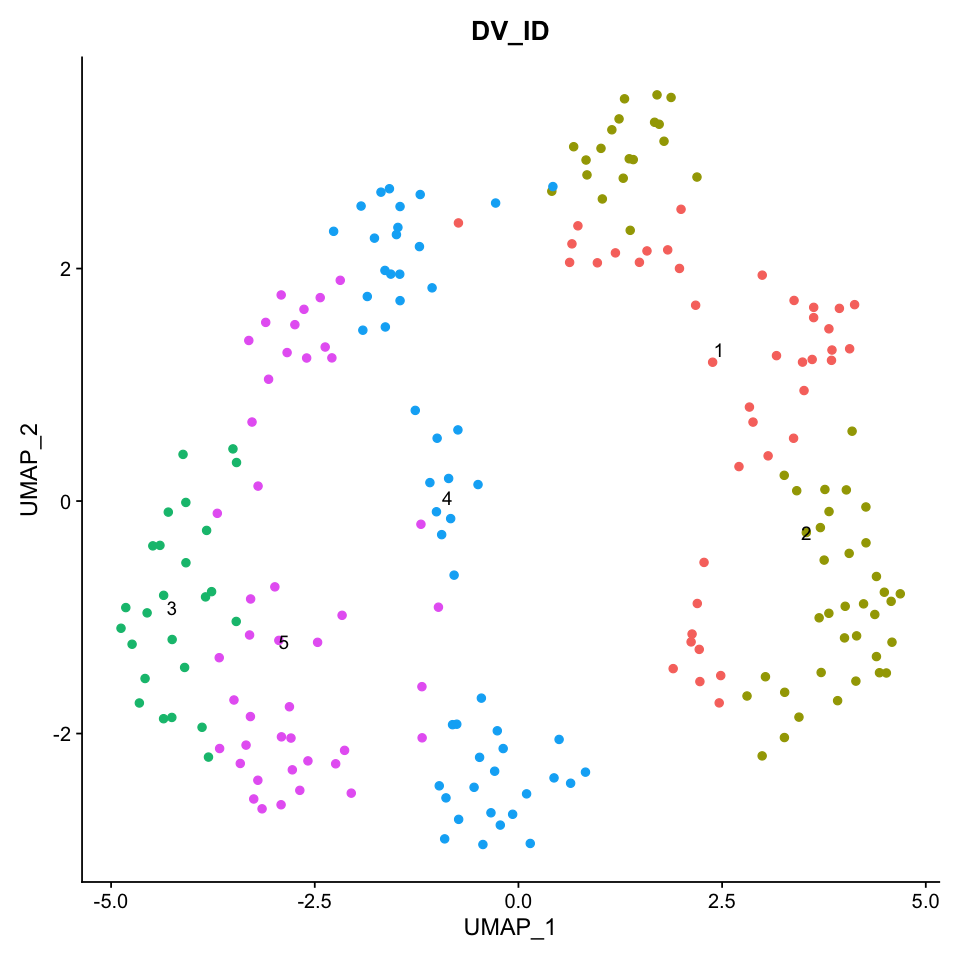

In [30]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC_dfd, reduction =  "umap", group.by = "DV_ID", label = TRUE, pt.size = 2) + NoLegend()

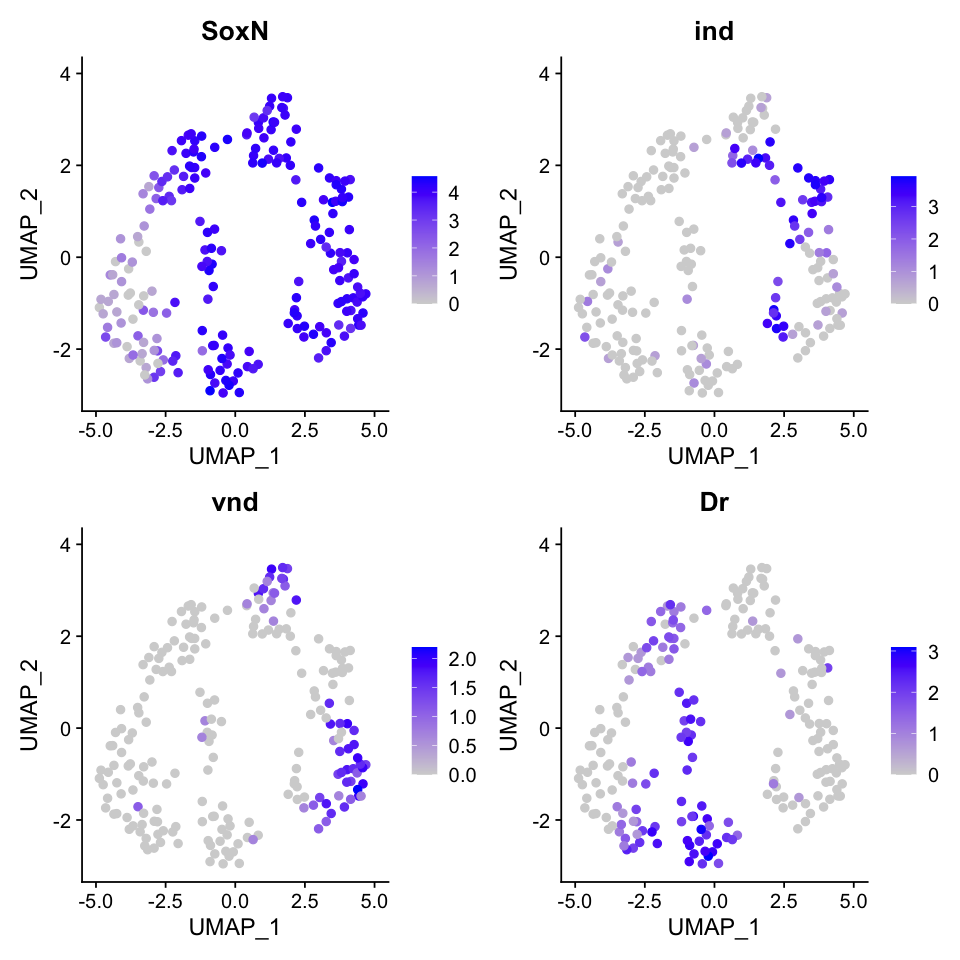

In [31]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_dfd, reduction = "umap", features = c("SoxN", "ind", "vnd", "Dr"), pt.size = 2,  ncol = 2)

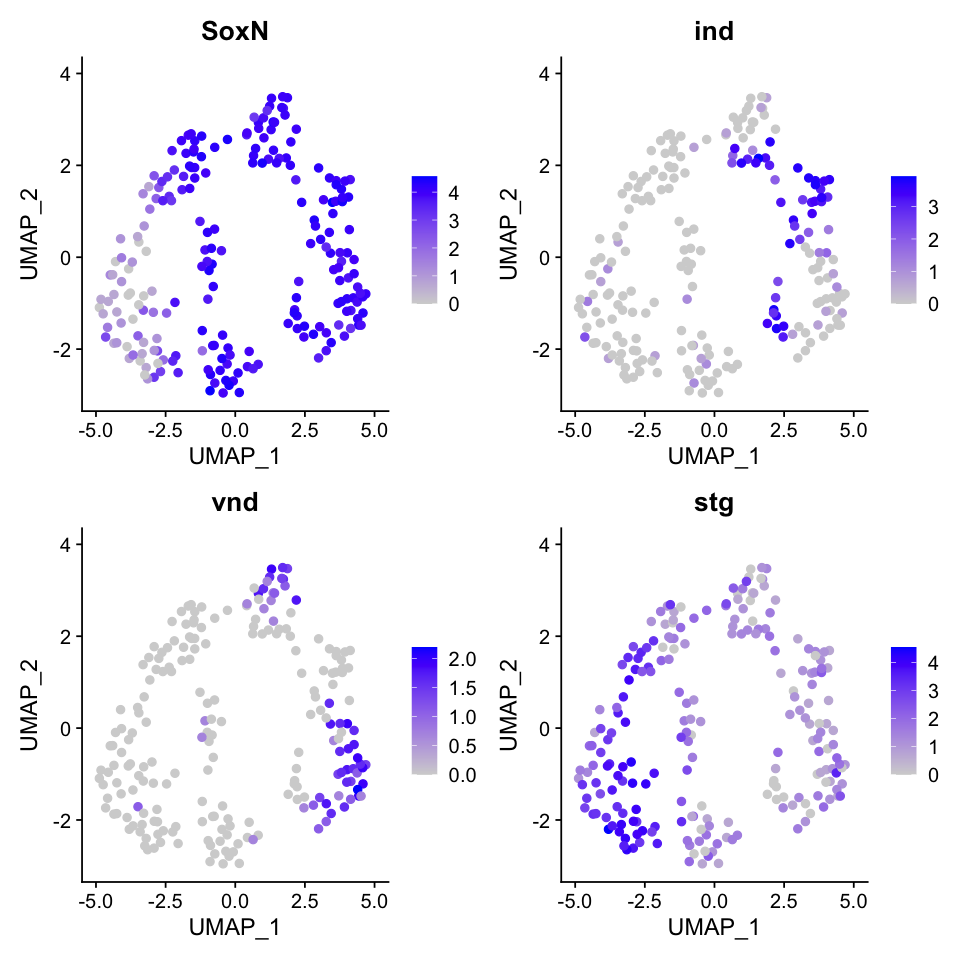

In [32]:
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu_HQC_dfd, reduction = "umap", features = c("SoxN", "ind", "vnd", "stg"), pt.size = 2,  ncol = 2)

In [33]:
Idents(seu_HQC_dfd) <- "DV_ID"
levels <- c(2,1,4,5,3)
levels(seu_HQC_dfd) <- levels

In [34]:
all.markers.dfd.DV <- FindAllMarkers(object = seu_HQC_dfd, only.pos = TRUE)


Calculating cluster 2

Calculating cluster 1

Calculating cluster 4

Calculating cluster 5

Calculating cluster 3



In [35]:
all.markers.dfd.DV.top10 <- all.markers.dfd.DV %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)


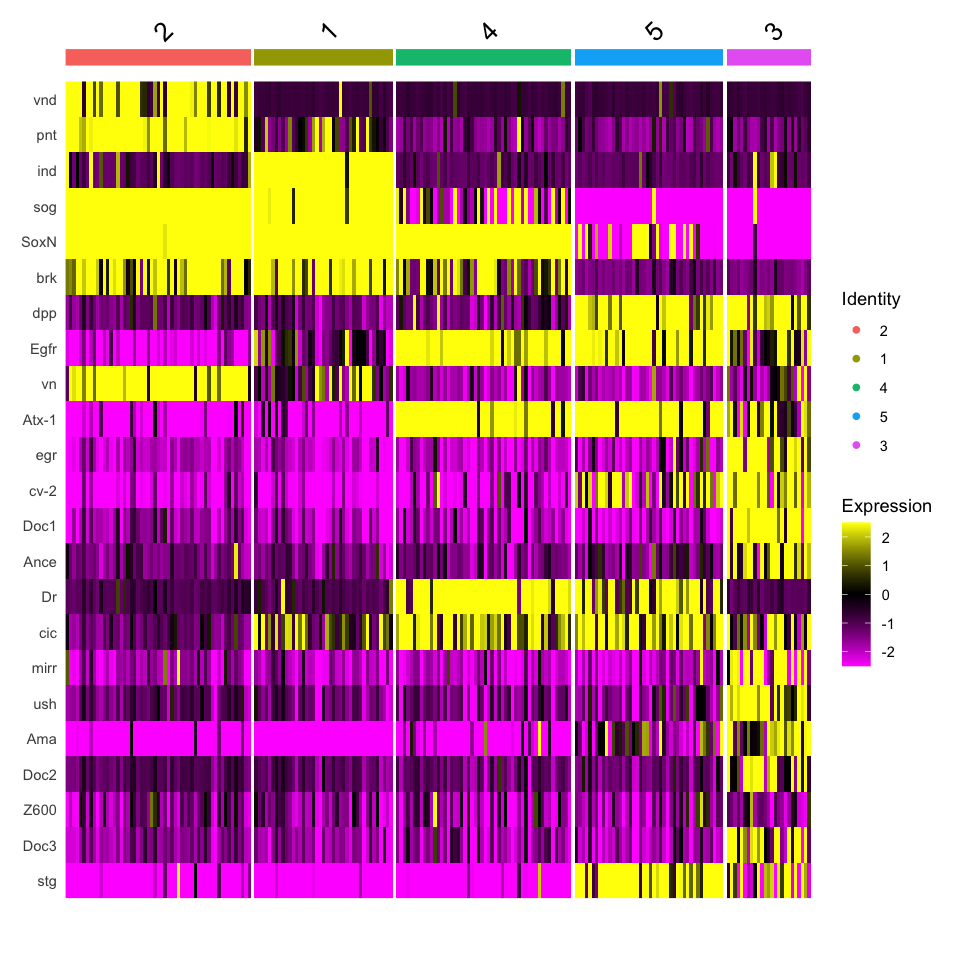

In [36]:
options(repr.plot.width=8, repr.plot.height=8)
DoHeatmap(seu_HQC_dfd, features = DV_genes)

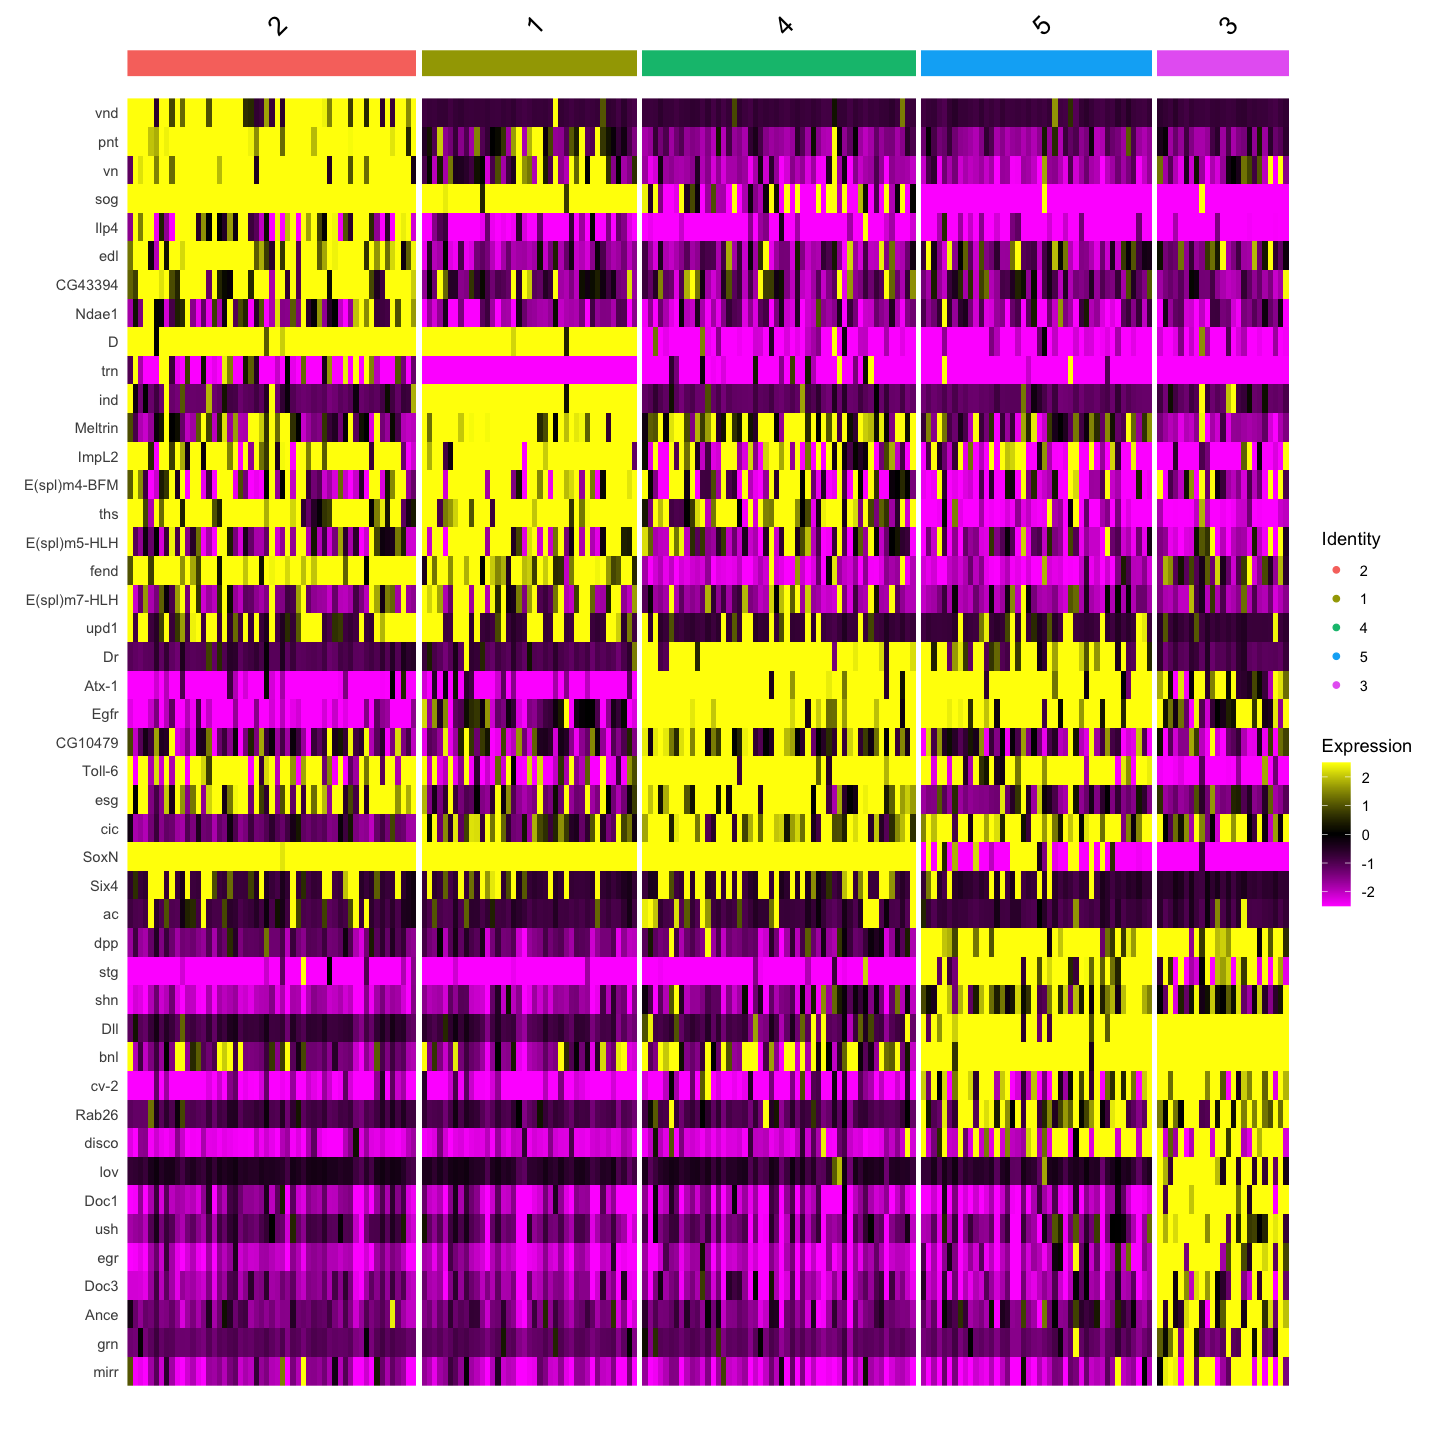

In [37]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu_HQC_dfd, features = c(all.markers.dfd.DV.top10$gene))

In [38]:
manual_ID <- as.data.frame(seu_HQC_dfd$DV_ID)
colnames(manual_ID) <- c('manual_ID')
head(manual_ID)

manual_ID$manual_ID <- dplyr::recode(manual_ID$manual_ID, 
                                "4" = "ectoderm_lateral_NE_PS1",
                                "2" = "ectoderm_medial_NE_PS1", 
                                "1" = "ectoderm_intermediate_NE_PS1",
                                "5" = "ectoderm_lateral_DE_PS1",
                                "3" = "ectoderm_medial_DE_PS1",
                                )
head(manual_ID)

manual_ID
AAAGTCCCACTAGAGG 1        
AACAAGAGTTCACCGG 2        
AACCTGAAGCGACTGA 3        
AAGAACAAGGAATTAC 1        
AAGCCATAGCAGCCTC 1        
AAGCGAGCAACAGCCC 3

manual_ID                   
AAAGTCCCACTAGAGG ectoderm_intermediate_NE_PS1
AACAAGAGTTCACCGG ectoderm_medial_NE_PS1      
AACCTGAAGCGACTGA ectoderm_medial_DE_PS1      
AAGAACAAGGAATTAC ectoderm_intermediate_NE_PS1
AAGCCATAGCAGCCTC ectoderm_intermediate_NE_PS1
AAGCGAGCAACAGCCC ectoderm_medial_DE_PS1

In [39]:
seu_HQC_dfd$manual_ID <-manual_ID

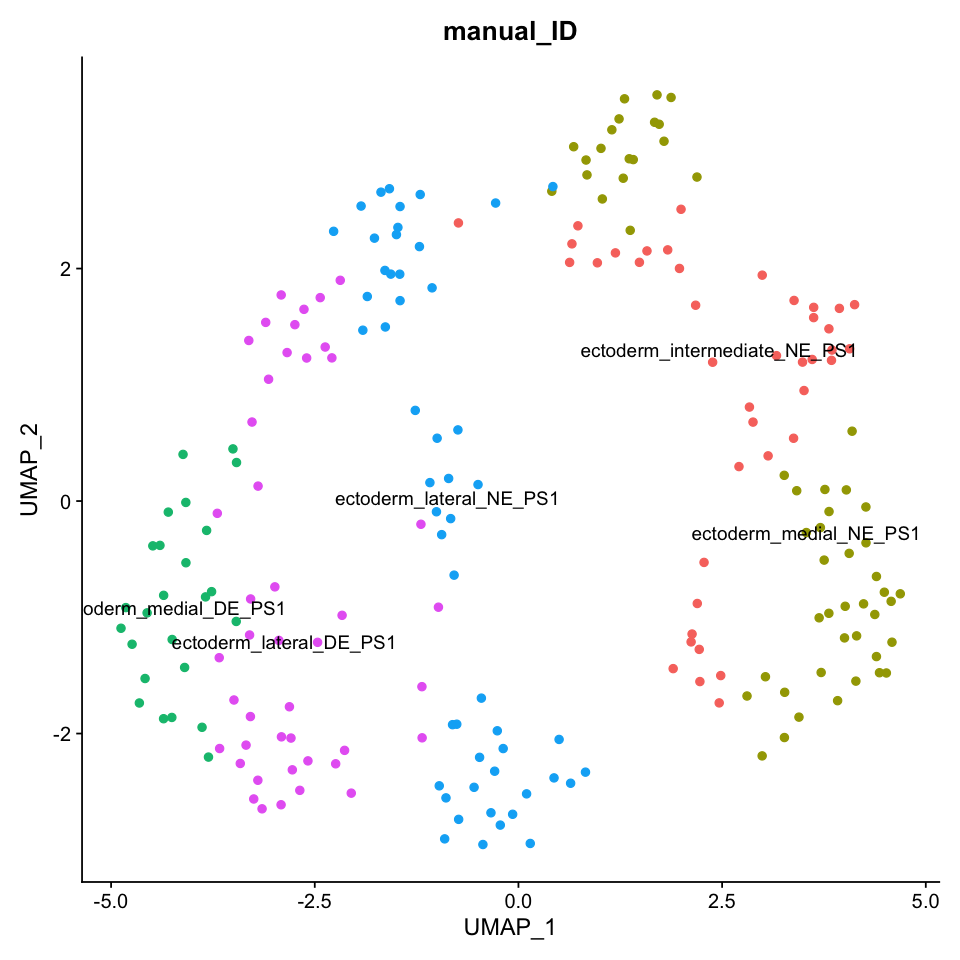

In [40]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC_dfd, reduction =  "umap", group.by = "manual_ID", label = TRUE, pt.size = 2) + NoLegend()

In [41]:
write.table(manual_ID, 
            file="./manual_ID_list/seu_HQC_PS1_DV_manualID.txt",sep="\t",col.names=T,row.names=T,quote=F)

In [42]:
Idents(seu_HQC_dfd) <- 'manual_ID'
levels(seu_HQC_dfd) <- c('ectoderm_medial_DE_PS1','ectoderm_lateral_DE_PS1',
                         'ectoderm_lateral_NE_PS1','ectoderm_intermediate_NE_PS1','ectoderm_medial_NE_PS1')
all.markers <- FindAllMarkers(seu_HQC_dfd, only.pos = T)
dim(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

Calculating cluster ectoderm_medial_DE_PS1

Calculating cluster ectoderm_lateral_DE_PS1

Calculating cluster ectoderm_lateral_NE_PS1

Calculating cluster ectoderm_intermediate_NE_PS1

Calculating cluster ectoderm_medial_NE_PS1



[1] 334   7

Saving 7 x 7 in image



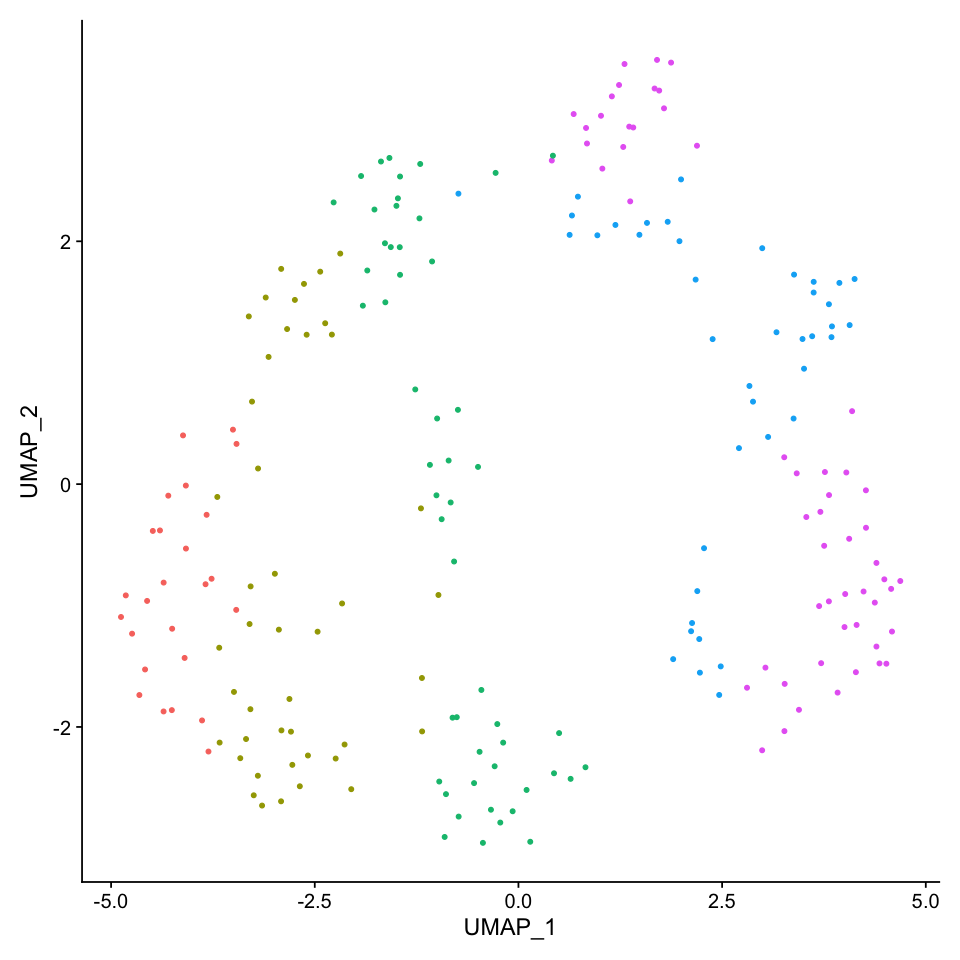

In [43]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC_dfd, reduction =  "umap", label = FALSE) + NoLegend() 

fig
ggsave(fig, file = "./figures/04_subclustering_Dfd_manualID/ecto_PS1_umap1.eps", dpi = 300)

Saving 7 x 7 in image



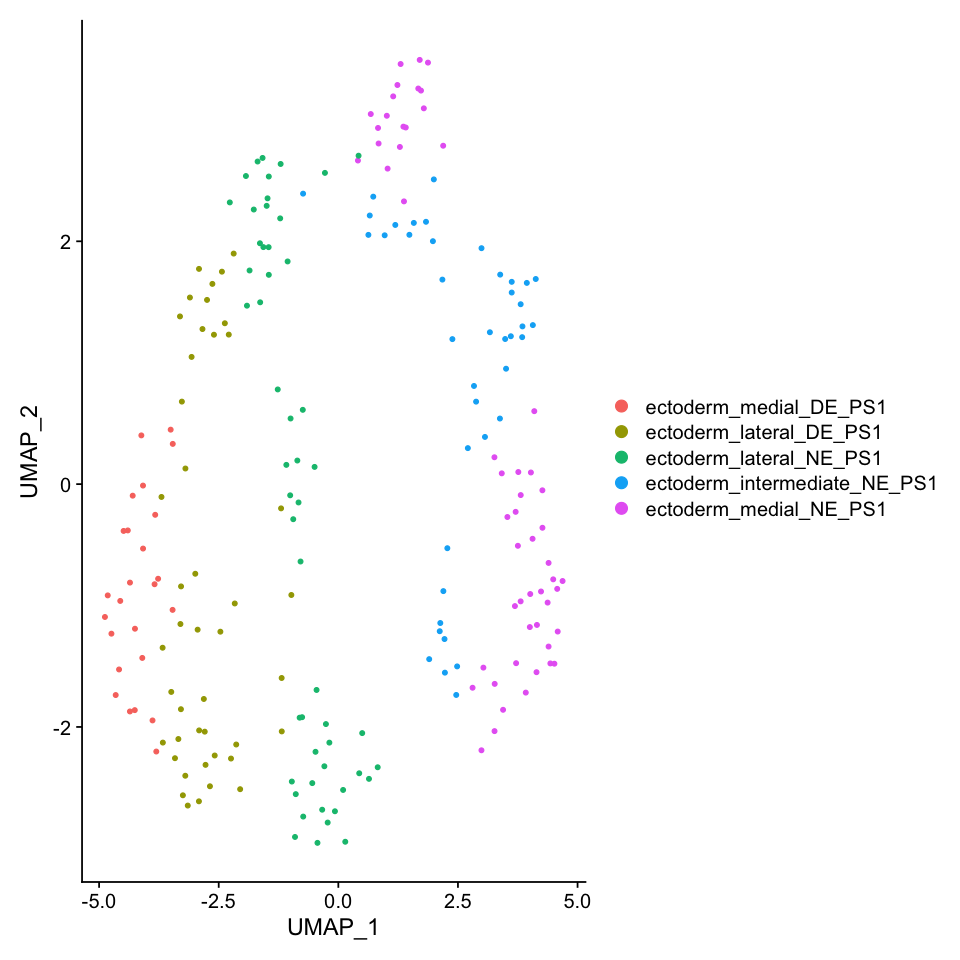

In [44]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC_dfd, reduction =  "umap", label = FALSE)

fig
ggsave(fig, file = "./figures/04_subclustering_Dfd_manualID/ecto_PS1_umap2.eps", dpi = 300)

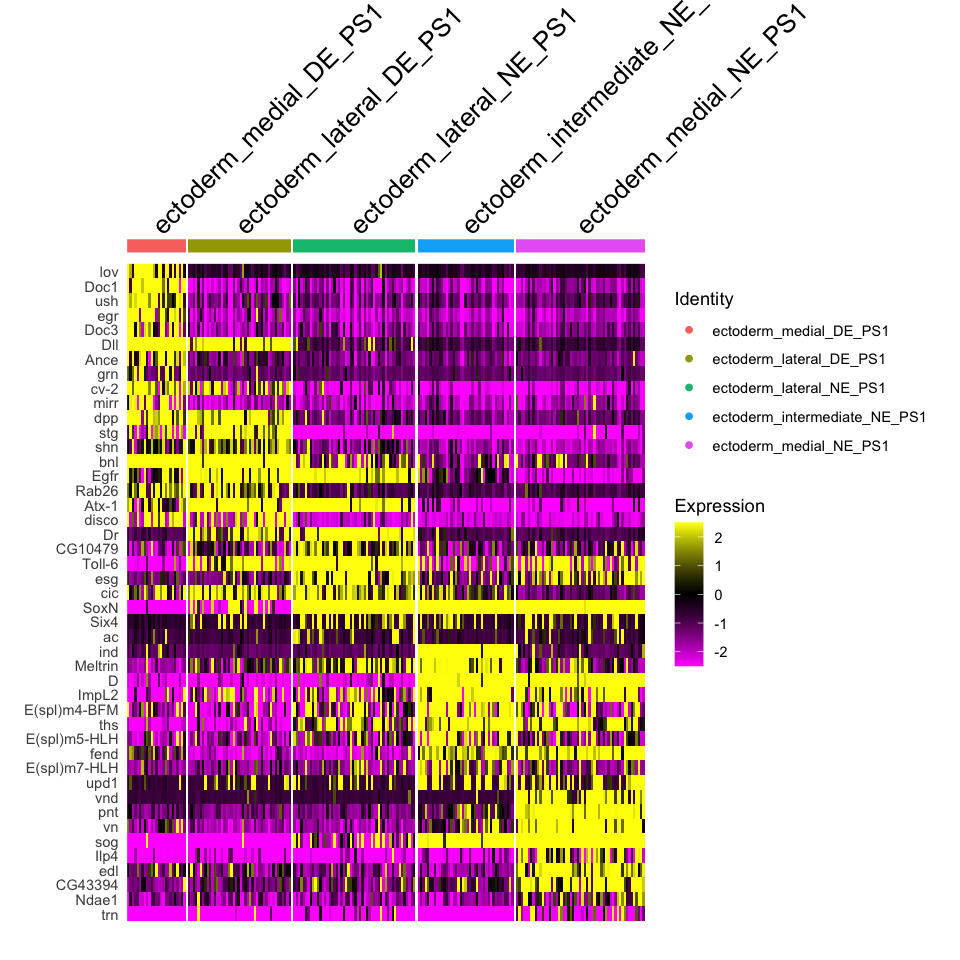

In [45]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DoHeatmap(seu_HQC_dfd,  features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/04_subclustering_Dfd_manualID/ecto_PS1_manualID_heatmap.eps", dpi = 300,  width = 12, height = 8)

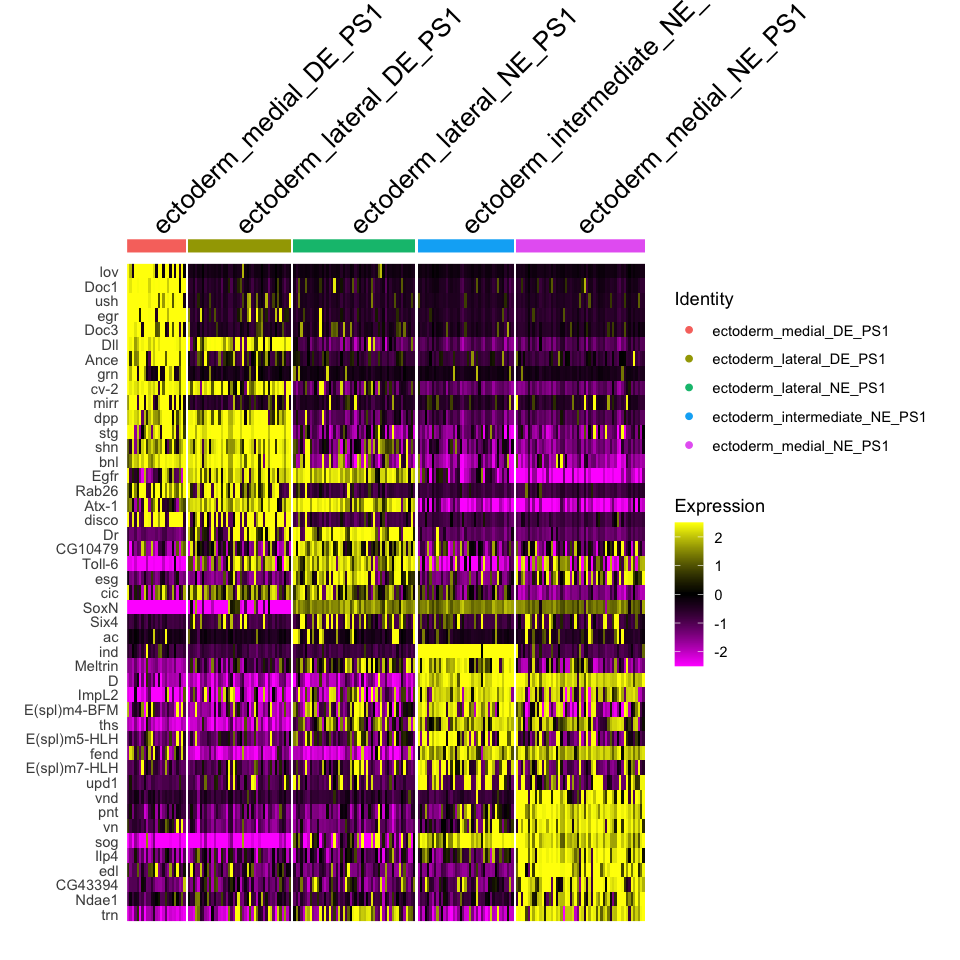

In [46]:
DefaultAssay(seu_HQC_dfd) <- 'RNA'
seu_renorm <- suppressWarnings(SCTransform(seu_HQC_dfd, vars.to.regress = c("percent.mt", "percent.rRNA"), verbose = FALSE))

options(repr.plot.width=8, repr.plot.height=8)
fig <- DoHeatmap(seu_renorm,  features = c(all.markers.top10$gene))
fig
ggsave(fig, file = "./figures/04_subclustering_Dfd_manualID/ecto_PS1_manualID_heatmap_renorm.eps", dpi = 300,  width = 12, height = 8)

In [47]:
write.table(all.markers, file = './subcluster_markers/markers_PS1.txt', sep = '\t')

In [48]:
saveRDS(seu_HQC_dfd, file = '../../data/seurat_object/Set3/subclustering/seu_PS1_subclustered.obj')

In [49]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv